In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_set = pd.read_csv("IRIS.csv")

In [3]:
data_set.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data_set.shape

(150, 5)

In [5]:
data_set.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data_set.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data_set.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
data_set.duplicated().sum()

3

In [10]:
data_set.drop_duplicates(inplace = True)

In [11]:
data_set.shape

(147, 5)

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

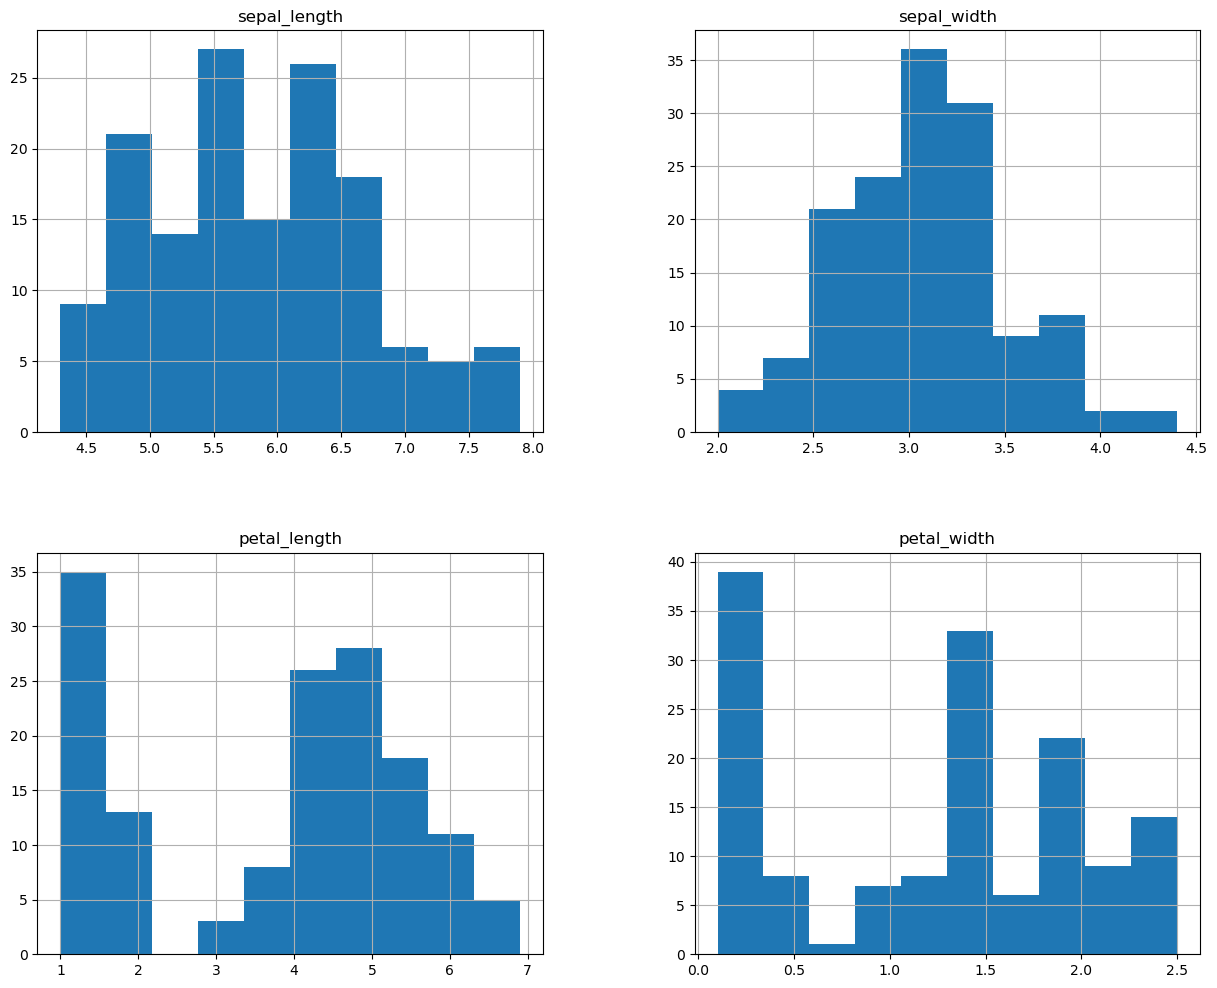

In [12]:
data_set.hist(figsize=(15,12))

In [13]:
for i in data_set.columns:
    print(i + ":" , data_set[i].nunique())


sepal_length: 35
sepal_width: 23
petal_length: 43
petal_width: 22
species: 3


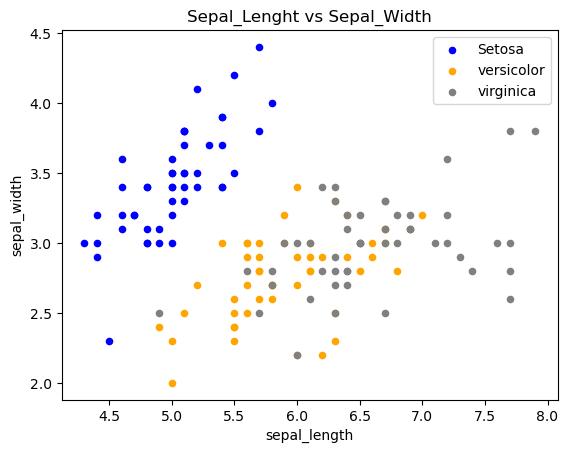

<Figure size 2000x2000 with 0 Axes>

In [14]:
fig =data_set[data_set.species == "Iris-setosa"].plot(kind ="scatter" , x="sepal_length" , y = "sepal_width", color = "b" , label="Setosa")
data_set[data_set.species == "Iris-versicolor"].plot(kind = "scatter" , x="sepal_length" , y ="sepal_width" , color = "orange" , label = "versicolor" , ax=fig)
data_set[data_set.species == "Iris-virginica"].plot(kind = "scatter" , x="sepal_length" , y ="sepal_width" , color="grey" , label="virginica" , ax = fig)
plt.title("Sepal_Lenght vs Sepal_Width")
plt.figure(figsize=(20 ,20))
plt.show()

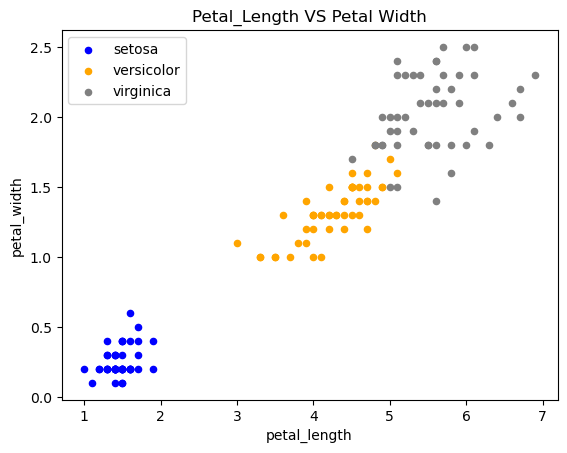

In [15]:
fig1 = data_set[data_set.species== "Iris-setosa"].plot(kind ="scatter" , x ="petal_length" , y ="petal_width" , color = "b" , label = "setosa")
data_set[data_set.species=="Iris-versicolor"].plot(kind = "scatter" , x = "petal_length" , y="petal_width" , color = "orange" ,label = "versicolor" , ax =fig1)
data_set[data_set.species == "Iris-virginica"].plot(kind = "scatter" , x ="petal_length" , y ="petal_width" , color ="grey" , label = "virginica" , ax=fig1)
plt.title("Petal_Length VS Petal Width")
plt.show()

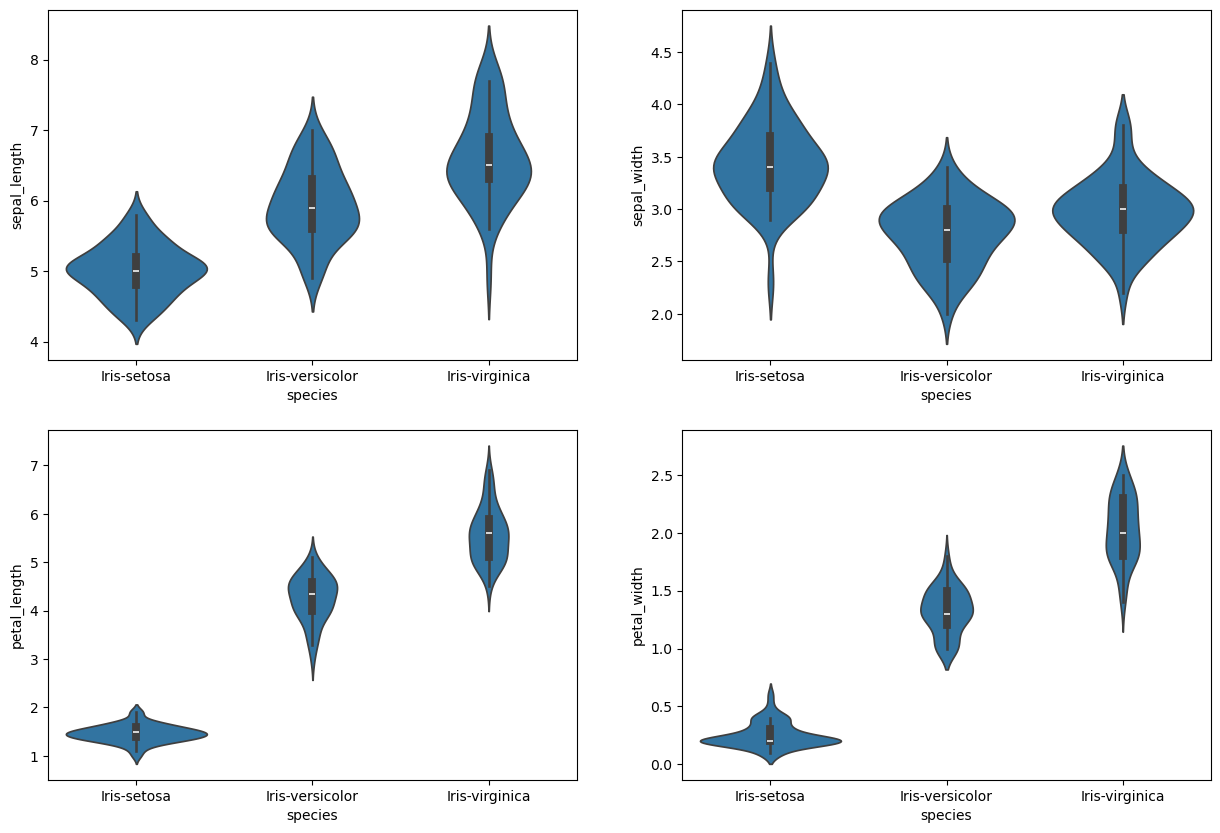

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
c=("y" , "g" , "b")
sns.violinplot(x = "species" , y ="sepal_length" , data =data_set)
plt.subplot(2,2,2)
sns.violinplot(x="species" , y="sepal_width" , data = data_set)
plt.subplot(2,2,3)
sns.violinplot(x="species" , y="petal_length" , data=data_set)
plt.subplot(2,2,4)
sns.violinplot(x="species", y="petal_width" , data=data_set)
plt.show()

# Train Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [19]:
non_ob = data_set.select_dtypes(exclude = object)

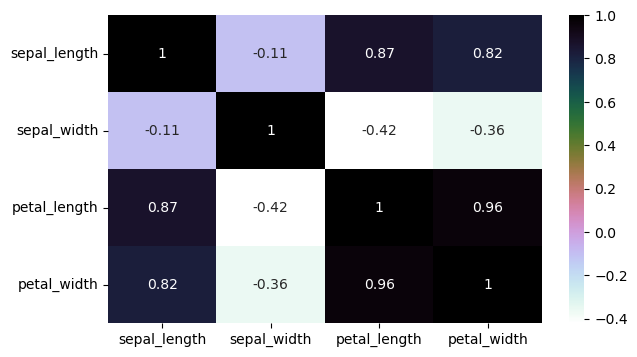

In [20]:
plt.figure(figsize=(7,4))
sns.heatmap(non_ob.corr(), annot =True , cmap="cubehelix_r")
plt.show()

In [21]:
x_train =data_set[["sepal_length" , "sepal_width" ,"petal_length" , "petal_width"]]
y_train = data_set.species


In [22]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
y_train

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_train , y_train ,test_size=0.25)
x_train.shape

(110, 4)

In [25]:
x_test.shape

(37, 4)

In [26]:
x_train.head(5)

,sepal_length,sepal_width,petal_length,petal_width
144,6.7,3.3,5.7,2.5
11,4.8,3.4,1.6,0.2
25,5.0,3.0,1.6,0.2
22,4.6,3.6,1.0,0.2
69,5.6,2.5,3.9,1.1


In [27]:
y_train.head(5)

144     Iris-virginica
11         Iris-setosa
25         Iris-setosa
22         Iris-setosa
69     Iris-versicolor
Name: species, dtype: object

In [28]:
x_test.head(5)

,sepal_length,sepal_width,petal_length,petal_width
54,6.5,2.8,4.6,1.5
63,6.1,2.9,4.7,1.4
15,5.7,4.4,1.5,0.4
53,5.5,2.3,4.0,1.3
88,5.6,3.0,4.1,1.3


In [29]:
y_test.head(5)

54    Iris-versicolor
63    Iris-versicolor
15        Iris-setosa
53    Iris-versicolor
88    Iris-versicolor
Name: species, dtype: object

In [33]:
model_LR = LogisticRegression(solver='lbfgs', max_iter=500)
model_DT = DecisionTreeClassifier()
model_RF = RandomForestClassifier()
model_SVR= SVC()

In [35]:
algo = ["LogisticRegresion"  , "DecissionTree"  , "RandomForest" , "SVM" ]
# Algo = ["LogisticRegresion" : model_LR , "DecissionTree" : model_DT , "RandomForest" : model_RF]
Score =[]

In [37]:
def recommend(model):
    model.fit(x_train , y_train)
    prediction = model.predict(x_test)
    score = metrics.accuracy_score(prediction ,y_test)
    Score.append(score)
    print(f"The accuracy score of model is : {score}")

In [47]:
recommend(model_LR)
recommend(model_DT)
recommend(model_RF)
recommend(model_SVR)


The accuracy score of model is : 0.972972972972973
The accuracy score of model is : 0.8918918918918919
The accuracy score of model is : 0.9459459459459459
The accuracy score of model is : 0.972972972972973


In [41]:
pd.DataFrame({"Algo" : algo , "Accuracy_score":Score})

,Algo,Accuracy_score
0,LogisticRegresion,0.972973
1,DecissionTree,0.918919
2,RandomForest,0.945946
3,SVM,0.972973
